In [1]:
import h5py
import pandas as pd
import matplotlib.pyplot as plt

In [3]:
h5_path = "../data/processed/air_quality.h5"

In [13]:
with h5py.File(h5_path, "r") as f:
    print("HDF5 structure:")
    for group in f["FR"].keys():
        print(f" └── {group}")

HDF5 structure:
 └── SPO-FR15038_38
 └── SPO-FR15038_5
 └── SPO-FR15038_6001
 └── SPO-FR15038_7
 └── SPO-FR15038_8
 └── SPO-FR15043_1
 └── SPO-FR15043_38
 └── SPO-FR15043_5
 └── SPO-FR15043_6001
 └── SPO-FR15043_7
 └── SPO-FR15043_8
 └── SPO-FR15043_9
 └── SPO-FR15046_38
 └── SPO-FR15046_5
 └── SPO-FR15046_8
 └── SPO-FR15046_9
 └── SPO-FR15053_38
 └── SPO-FR15053_5
 └── SPO-FR15053_6001
 └── SPO-FR15053_8
 └── SPO-FR15053_9


In [17]:
with h5py.File(h5_path, "r") as f:
    group_name = "SPO-FR15038_38"
    grp = f[f"FR/{group_name}"]
    
    print(f"Contents of group '{group_name}':")
    for item in grp:
        print(item)

    print("\nAttributes:")
    for key, val in grp.attrs.items():
        print(f"🔑 {key}: {val}")

Contents of group 'SPO-FR15038_38':
38

Attributes:


In [20]:
group_name = "SPO-FR15038_38"
pollutant_code = "38"  # Nested inside

with h5py.File(h5_path, "r") as f:
    grp = f[f"FR/{group_name}/{pollutant_code}"]

    # Read datasets
    timestamps = [ts.decode("utf-8") for ts in grp["timestamps"][:]]
    values = grp["values"][:]

    # Metadata
    unit = grp.attrs.get("unit", "unknown")
    agg_type = grp.attrs.get("agg_type", "")
    validity = grp.attrs.get("validity", "")
    result_time = grp.attrs.get("result_time", "")

df = pd.DataFrame({
    "timestamp": pd.to_datetime(timestamps),
    "value": values
})

df.head()

,timestamp,value
0,2024-01-01 01:00:00,0.6
1,2024-01-01 02:00:00,0.0
2,2024-01-01 03:00:00,0.3
3,2024-01-01 04:00:00,0.2
4,2024-01-01 05:00:00,0.0


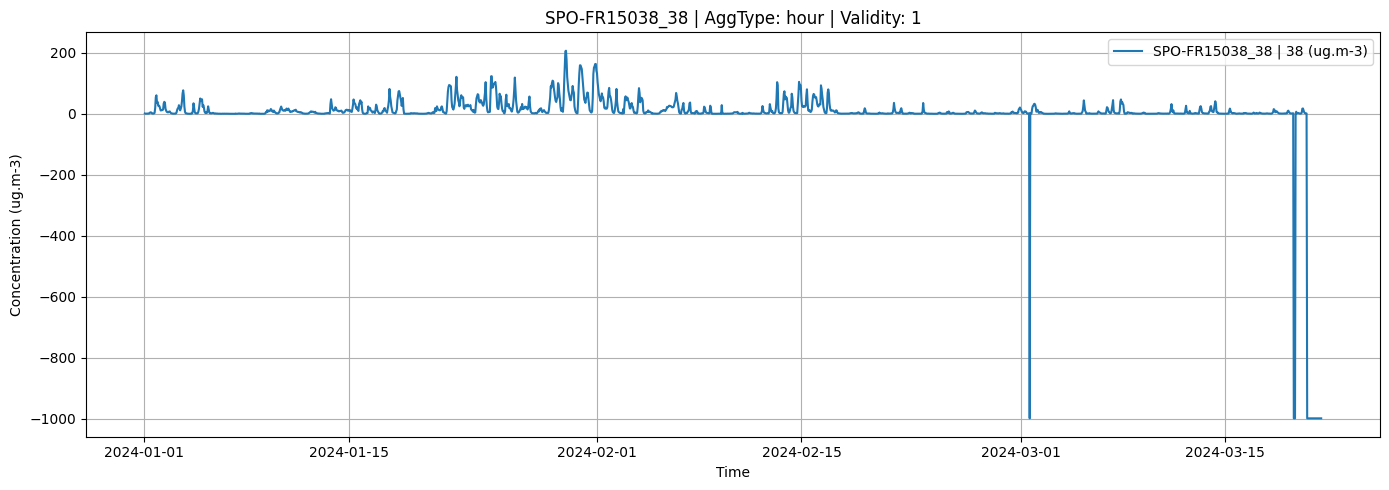

In [22]:
plt.figure(figsize=(14, 5))
plt.plot(df["timestamp"], df["value"], label=f"{group_name} | {pollutant_code} ({unit})")
plt.title(f"{group_name} | AggType: {agg_type} | Validity: {validity}")
plt.xlabel("Time")
plt.ylabel(f"Concentration ({unit})")
plt.grid(True)
plt.legend()
plt.tight_layout()
plt.show()

In [1]:
import h5py
import pandas as pd
import matplotlib.pyplot as plt
import ipywidgets as widgets
from IPython.display import display

In [2]:
POLLUTANT_MAP = {
    "1": "SO2",
    '5': "NO2",
    '7': "NO",
    '8': "NOx",
    '9': "CO",
    '10': "Benzene",
    '38': "PM10",
    '6001': "PM2.5",
    '6006': "O3"
}
station_pollutant_map = {}

with h5py.File(h5_path, "r") as f:
    for group_name in f["FR"]:
        subgroup = list(f["FR"][group_name].keys())
        station_pollutant_map[group_name] = subgroup

station_dropdown = widgets.Dropdown(
    options=list(station_pollutant_map.keys()),
    description="Station:",
    style={"description_width": "initial"},
    layout=widgets.Layout(width="50%")
)

pollutant_dropdown = widgets.Dropdown(
    options=[],
    description="Pollutant:",
    style={"description_width": "initial"},
    layout=widgets.Layout(width="50%")
)

def update_pollutants(*args):
    station = station_dropdown.value
    pollutant_options = station_pollutant_map.get(station, [])
    pollutant_dropdown.options = [
        (POLLUTANT_MAP.get(p, p), p) for p in pollutant_options
    ]

station_dropdown.observe(update_pollutants, names="value")
update_pollutants()

display(station_dropdown, pollutant_dropdown)
plot_button = widgets.Button(description="📈 Plot", button_style="success")

output_plot = widgets.Output()

def on_plot_clicked(b):
    output_plot.clear_output()
    
    station = station_dropdown.value
    pollutant = pollutant_dropdown.value

    with h5py.File(h5_path, "r") as f:
        grp = f[f"FR/{station}/{pollutant}"]
        timestamps = [ts.decode("utf-8") for ts in grp["timestamps"][:]]
        values = grp["values"][:]

        # Metadata
        unit = grp.attrs.get("unit", "unknown")
        agg_type = grp.attrs.get("agg_type", "")
        validity = grp.attrs.get("validity", "")
    
    # Get label name *after* loading metadata
    label_name = POLLUTANT_MAP.get(pollutant, pollutant)

    df = pd.DataFrame({
        "timestamp": pd.to_datetime(timestamps),
        "value": values
    })

    with output_plot:
        plt.figure(figsize=(14, 5))
        plt.plot(df["timestamp"], df["value"], label=f"{label_name} ({unit})")
        plt.title(f"{station} | {label_name} | Aggregation: {agg_type} | Validity: {validity}")
        plt.xlabel("Time")
        plt.ylabel(f"Concentration ({unit})")
        plt.grid(True)
        plt.legend()
        plt.tight_layout()
        plt.show()

plot_button.on_click(on_plot_clicked)

display(plot_button, output_plot)

NameError: name 'h5_path' is not defined